In [20]:
# 查找字符串
import os
base_dir = "D:/git/tensor2tensor"
pattern = 'log_step_count_steps'
for root, paths, files in os.walk(base_dir):
    for file in files:
        if file.endswith('py'):
            file = os.path.join(root, file)
            with open(file, 'r', encoding='utf-8') as f:
                num=0
                for line in f:
                    num+=1
                    if 'log' in line and 'step' in line and 'steps' in line:
                        print(file+':'+str(num))

D:/git/tensor2tensor\tensor2tensor\layers\common_layers.py:1456
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:268
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:270
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:338
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:340
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:354
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:356
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:370
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:372
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:386
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:388
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:402
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:404
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:418
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:420
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:434
D:/git/tensor2tensor\tensor2tensor\models\aligned.py:436
D:/git/tensor2tensor\ten

In [22]:
# 随机提取1000条记录
import random
fen = open('../translate_data/train.en', 'r', encoding='utf-8').readlines()
fzh = open('../translate_data/train.zh',  'r', encoding='utf-8').readlines()
fwen = open('../translate_data/train_1000.en', 'w', encoding='utf-8')
fwzh = open('../translate_data/train_1000.zh', 'w', encoding='utf-8')
index = set(random.sample(range(len(fen)), 1000))
for i in range(len(fen)):
    line_en = fen[i]
    line_zh = fzh[i]
    if i in index:
        count += 1
        fwen.write(line_en)
        fwzh.write(line_zh)
        fwen.flush()
        fwzh.flush()
fwen.close()
fwzh.close()

In [26]:
# 使用结巴分词
import jieba

content = open('../translate_data/train_1000.zh', 'r', encoding='utf-8').read()
fw = open('../translate_data/train_1000_jieba.zh',  'w', encoding='utf-8')
res = '/'.join(jieba.cut(content))
fw.write(res)
fw.flush()
fw.close()

In [2]:
# 创建词典

base_dir = '../translation_train_20170912/'
def check_chinese(s):
    for ch in s:
        if not u'\u4e00' <= ch <= u'\u9fa5':
            return False
    return True
word = None
fw = open(base_dir+'dict.zh', 'w', encoding='utf-8')
fr = open(base_dir+'ansj_nrf.zh', 'r', encoding='utf-8')
word = set([line.strip() for line in fr.readlines()])
fr.close()
# with open(base_dir+'train_hanlp_word_freq.zh', 'r', encoding='utf-8') as fr:
#     for line in fr.readlines():
#         s = line.strip().split('\t')
#         if len(s)<2 or (not check_chinese(s[0])):continue
#         if int(s[1]) < 20:break
#         if len(s[0]) >= 3:
#             word.add(s[0])

with open(base_dir+'train_ansj_word_freq.zh', 'r', encoding='utf-8') as fr:
    for line in fr.readlines():
        s = line.strip().split('\t')
        if len(s)<3 or (not check_chinese(s[0])):continue
        if int(s[2]) < 20:break
        if len(s[0]) >= 3:
            word.add(s[0])
for w in word:
    fw.write(w+'\n')
fw.flush()
fw.close()

In [10]:
# 从HanLP分词的词频中统计非中文字符
c = '.。，-！“”？、（《》）%·：；‘’<>'
table={}
def check_chinese(s):
    for ch in s:
        if not( u'\u4e00' <= ch <= u'\u9fa5' or '0'<=ch<='9' or 'a'<=ch<='z' or 'A'<=ch<='Z' or ch==' ' or ch in c):
            table[ch] = 1 + table.get(ch, 0)

with open('../translate_data/train_hanlp_word_freq.zh', 'r', encoding='utf-8') as fr:
    for line in fr.readlines():
        s = line.strip().split('\t')[0].split('/')[0]
        check_chinese(s)
table = [(k,v) for k, v in table.items()]
table=sorted(table, key=lambda t:t[1], reverse=True)
for k, v in table:
    print('{}\t{}'.format(k, v))
# 1350907

&	94
"	1
~	1


In [6]:
c_num = {}
with open("../translate_data/train.en", 'r', encoding='utf-8') as f:
    for line in f.readlines():
        for c in line:
            if not((c>='a' and c<='z') or (c>='A' and c<='Z') or (c>='0' and c<='9')):
                c_num[c] = c_num.get(c, 0) + 1
c_num = [(k, v) for k, v in c_num.items()]
c_num = sorted(c_num, key=lambda t:t[1], reverse=True)
for k , v in c_num:
    print("{}\t{}".format(k, v))

 	94138015
.	10082618

	10000000
,	5583849
'	4036628
?	1593648
-	1079597
!	534389
"	305151
:	139595
)	77977
(	77912
;	64909
$	34411
%	29750
/	19176
&	15078
’	13599
`	6372
*	3083
”	2610
‘	2420
…	2190
 	1788
–	1736
~	1594
[	1490
]	1489
#	1266
+	1196
@	1192
—	1091
_	829
“	731
=	701
é	697
。	416
®	329
£	315
^	225
<	214
\	212
！	185
>	176
	170
|	159
，	139
		139
·	81
‐	73
°	72
€	48
½	47
™	46
ü	43
ó	38
′	38
à	34
？	29
è	29
¼	27
¾	25
¬	20
á	18
〇	16
•	16
ï	15
í	14
}	14
″	13
©	13
ñ	13
Ø	12
{	11
ö	11
 	10
￡	10
〞	10
、	10
ç	9
ﬁ	8
ﬂ	8
〃	7
〝	7
×	6
》	6
μ	5
≥	5
℃	5
º	5
㎡	5
ë	5
―	4
„	3
Ⅲ	2
ú	2
±	2
℉	2
ò	2
˚	2
ì	2
¢	2
â	2
ô	2
ä	2
ê	2
É	2
ā	2
ǔ	2
：	1
«	1
⑶	1
²	1
⁄	1
↘	1
ō	1
ª	1
◊	1
Ⅹ	1
Ⅳ	1
ě	1
³	1
Ⅶ	1
≤	1
￥	1
ū	1
´	1
Ö	1


en
i:-1,count:0.0
i:1,count:0.0001871583147590378
i:2,count:0.0014266823569374855
i:3,count:0.007692129535170213
i:4,count:0.028360936519472957
i:5,count:0.07124930656576073
i:6,count:0.14198764997755645
i:7,count:0.22982202865496368
i:8,count:0.3259963671214566
i:9,count:0.4198782643795928
i:10,count:0.5078014246971774
i:11,count:0.58561219076693
i:12,count:0.6536791442552764
i:13,count:0.7106555614253148
i:14,count:0.757753504669032
i:15,count:0.7954906646932511
i:16,count:0.8256735548720165
i:17,count:0.8493972222926839
i:18,count:0.8681936741151338
i:19,count:0.8832015210886724
i:20,count:0.8955373164122512
i:21,count:0.9058012460310195
i:22,count:0.9146004440184886
i:23,count:0.9222105194663396
i:24,count:0.9290363387113317
i:25,count:0.9352254667653375
i:26,count:0.9409164250445838
i:27,count:0.9461921499384043
i:28,count:0.951114843738799
i:29,count:0.9556508686814769
i:30,count:0.9598742278478779
i:31,count:0.9637574595878106
i:32,count:0.9673381720246295
i:33,count:0.970667979

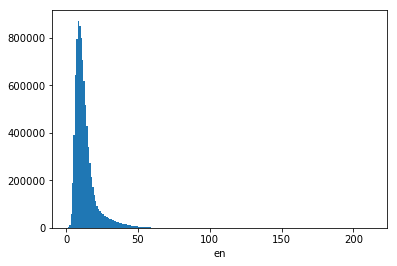

zh
i:-1,count:0.0
i:1,count:0.0002762708181917441
i:2,count:0.0019075369546684253
i:3,count:0.013003036221806315
i:4,count:0.04990421508758502
i:5,count:0.11854819409320859
i:6,count:0.2152948157036524
i:7,count:0.3244577426964694
i:8,count:0.4324639717486895
i:9,count:0.529998378770049
i:10,count:0.613782991202346
i:11,count:0.6820723950860189
i:12,count:0.7366052768277713
i:13,count:0.7791278224014275
i:14,count:0.8122459108058836
i:15,count:0.837790208432822
i:16,count:0.8579511403202095
i:17,count:0.87385849419721
i:18,count:0.8868029676228247
i:19,count:0.8976575984400901
i:20,count:0.9070275355429852
i:21,count:0.9152481639846524
i:22,count:0.9226854185254748
i:23,count:0.9294360215237576
i:24,count:0.9357412825803805
i:25,count:0.94160285601162
i:26,count:0.9470892305113271
i:27,count:0.9521533132094949
i:28,count:0.9568810182647546
i:29,count:0.9612933003499431
i:30,count:0.9653711899717553
i:31,count:0.9691120402241489
i:32,count:0.9725061457849675
i:33,count:0.975654199371580

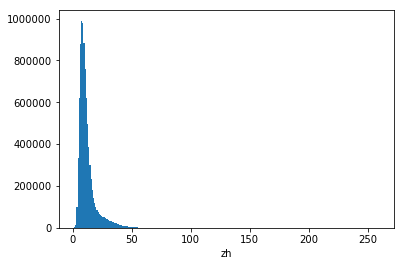

In [1]:
# 绘制句长分布直方图
import numpy as np
def showWordLen(file):
    res = []
    with open(file, 'r', encoding='utf-8') as f:
        for line in f:
            res.append(len(line.split()))
    return res
import pylab as pl
def f(file, label):
    print(label)
    data = showWordLen(file)
    a = min(data)
    b = max(data)
    data = sorted(data)
    pre=-1
    count = 0
    for i in range(len(data)):
        if data[i] == pre:
            count+=1
        else:
            print("i:{},count:{}".format(pre, count / len(data)))
            pre = data[i]
            count += 1
    print("i:{},count:{}".format(i, count / len(data)))
    pl.hist(np.asarray(data), bins=np.arange(a, b, 1))
    pl.xlabel(label)
    pl.show()
f('../translation_train_20170912/train_token.en2', 'en')
f('../translation_train_20170912/train_jieba.zh', 'zh')

In [33]:
# 总共英语词性
pos = set()
with open('../translation_train_20170912/train_pos.en', 'r', encoding='utf-8') as f:
    for line in f:
        pos.update([d.split('_')[1] for d in line.split()])
print(len(pos))
print(pos)

42
{'NNPS', 'CC', 'IN', 'JJS', 'NNS', 'SYM', ',', 'CD', "''", 'TO', 'WRB', 'WP$', 'MD', 'RBS', 'PRP$', 'UH', 'VBZ', 'PDT', 'RB', 'RP', 'JJ', 'FW', 'VBD', ':', 'VBP', 'VB', 'NNP', 'LS', 'NN', 'WP', 'POS', '``', 'DT', '$', 'JJR', 'PRP', 'EX', 'VBN', 'VBG', 'RBR', 'WDT', '.'}


In [34]:
import tqdm
a=range(10000)
for i in tqdm.tqdm(a):
    i+=1

100%|██████████| 10000/10000 [00:00<00:00, 806116.35it/s]


en
3
20


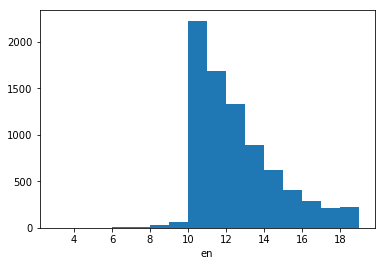

zh
5
59


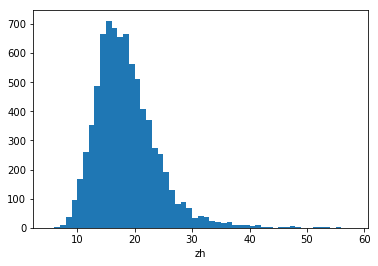

In [7]:
'''
处理验证集
先对验证集进行过滤，去除特殊字符
再统计句子长度分布图
'''
def filter(file):
    fr = open(file, 'r', encoding='utf-8')
    res = []
    for line in fr:
        line = line.replace('&', ' ').replace('<p1.3/>','')
        res.append(line)
    fr.close()
    fw = open(file, 'w', encoding='utf-8')
    for line in res:
        fw.write(line)
    fw.flush()
    fw.close()
filter('../translation_validation_20170912/valid.en-zh.en.sgm')
filter('../translation_validation_20170912/valid.en-zh.zh.sgm')

# 画图
def f(file, label):
    print(label)
    import xml.dom.minidom
    dom=xml.dom.minidom.parse(file)
    root = dom.documentElement
    sentences = root.getElementsByTagName('seg')
    fw = open(file[:-3], 'w', encoding='utf-8') 
    length = []
    for sentence in sentences:
        s = sentence.childNodes[0].data.strip()
        length.append(len(s.split() if label=='en' else s))
        fw.write(s+'\n')
    fw.flush();fw.close()
    import numpy as np
    import pylab as pl
    data = np.asarray(length)
    print(data.min())
    print(data.max())
    pl.hist(data, bins=np.arange(data.min(), data.max(), 1))
    pl.xlabel(label)
    pl.show()

f('../translation_validation_20170912/valid.en-zh.en.sgm', 'en')
f('../translation_validation_20170912/valid.en-zh.zh.sgm', 'zh')

1
1
1
1
1
1
1
1
1
1
1
1
en
5
20


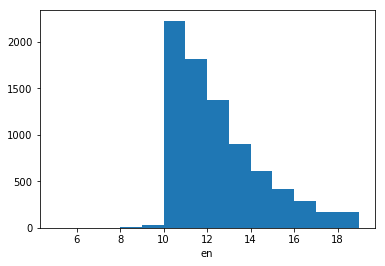

In [2]:
'''
处理测试集
先对测试集进行过滤，去除特殊字符
再统计句子长度分布图
'''
src_sgm = '../ai_challenger_translation_test_a_20170923/ai_challenger_translation_test_a_20170923.sgm'
dst_sgm = '../ai_challenger_translation_test_a_20170923/test_a.sgm'
dst_en = '../ai_challenger_translation_test_a_20170923/test_a.en'
def filter(src, dst):
    fr = open(src, 'r', encoding='utf-8')
    res = []
    for line in fr:
        if '&' in line or '<p1.3/>' in line:
            print(1)
        line = line.replace('&', ' ').replace('<p1.3/>','')
        res.append(line)
    fr.close()
    fw = open(dst, 'w', encoding='utf-8')
    for line in res:
        fw.write(line)
    fw.flush()
    fw.close()
filter(src_sgm,dst_sgm)

# 画图
def f(src, dst, label):
    print(label)
    import xml.dom.minidom
    dom=xml.dom.minidom.parse(src)
    root = dom.documentElement
    sentences = root.getElementsByTagName('seg')
    fw = open(dst, 'w', encoding='utf-8') 
    length = []
    for sentence in sentences:
        s = sentence.childNodes[0].data.strip()
        length.append(len(s.split() if label=='en' else s))
        fw.write(s+'\n')
    fw.flush();fw.close()
    import numpy as np
    import pylab as pl
    data = np.asarray(length)
    print(data.min())
    print(data.max())
    pl.hist(data, bins=np.arange(data.min(), data.max(), 1))
    pl.xlabel(label)
    pl.show()

f(dst_sgm, dst_en, 'en')

In [4]:
# 结巴中文分词
import jieba
word_freq = {}
base_dir = 'C:/Users/zgy/Desktop/translation_validation_20170912/'
fw = open(base_dir+'valid_jieba.zh', 'w', encoding='utf-8')
with open(base_dir+"valid.zh", 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        seg_list = jieba.cut(line, cut_all=False)
        sentence = ''
        for word in seg_list:
            word = word.strip()
            if word == '':continue
            word_freq[word] = word_freq.get(word, 0) + 1
            sentence += word + ' '
        fw.write(sentence.strip()+'\n')
        fw.flush()
fw.flush()
fw.close()

fw = open(base_dir+'valid_jieba_word_freq.zh', 'w', encoding='utf-8')
for k,v in sorted(word_freq.items(), key=lambda x:x[1], reverse=True):
    fw.write(k+'\t'+str(v)+'\n')
fw.flush()
fw.close()

In [7]:
words = set()
with open('../translation_train_20170912/train_word_freq.en', 'r', encoding='utf-8') as f:
    for line in f.readlines()[:210000]:
        word = line.split()[0].split('_')[0]
        words.add(word)
print(len(words))

156750


In [2]:
# 得到align词汇表
BASE_DIR = "../translation_train_20170912/"
TOKEN_EN = "train_token.en"
POS_EN = "train_pos.en"
WORD_FREQ_EN = "train_word_freq.en"
TOKEN_ZH = "train_hanlp.zh"
POS_ZH = "train_hanlp_pos.zh"
WORD_FREQ_ZH = "train_hanlp_word_freq.zh"
ALIGN = "aligned.grow-diag-final-and.train"
# 只提取词频小于100的名词
def get_en_word_less100():
    words = set()
    with open(BASE_DIR + WORD_FREQ_EN, 'r',encoding='utf-8')  as f:
        for line in f:
            line = line.rstrip()
            s = line.split('\t')
            if(int(s[1])<100):words.add(s[0])
    return words

words = get_en_word_less100()
fen_token = open(BASE_DIR + TOKEN_EN, 'r', encoding='utf-8')
fen_pos = open(BASE_DIR + POS_EN , 'r', encoding='utf-8')
fzh_token = open(BASE_DIR + TOKEN_ZH, 'r',encoding='utf-8')
falign = open(BASE_DIR + ALIGN, 'r', encoding='utf-8')
unk_dict = {}
for entoken, enpos, aligns, zhtoken in zip(fen_token, fen_pos, falign, fzh_token):
    align = {}
    for tt in aligns.split():
        k = int(tt.split('-')[0])
        v = int(tt.split('-')[1])
        if k in align:
            align[k].append(v)
        else:
            align[k] = [v]
            
    zhtoken = zhtoken.split(' ')
    for i,(t,p) in enumerate(zip(entoken.split(' '), enpos.split(' '))):
        if t in words and p.startswith('n'):
            v = [zhtoken[tmp] for tmp in align[i]]
            if t not in unk_dict:
                unk_dict[t] = {vv:1 for vv in v}
            else:
                dd = unk_dict[t]
                for vv in v:
                    dd[vv] = dd.get(vv, 0) + 1
fw = open(BASE_DIR + 'unk.dict', 'w', encoding='utf-8')                
for k, v in unk_dict:
    v = sorted(v, key=lambda x:x[1], reverse=True)
    fw.write(k + ' '+v[0][0]+'\n')
    print(k + str(v))
fen_token.close()
fen_pos.close()
fzh_token.close()
falign.close()
fw.flush()
fw.close()

In [39]:
train={}
count = 0
with open("D:\\data_nmt\\data_train\\train.en", 'r', encoding='utf-8') as f, open("D:\\data_nmt\\data_train\\train.zh", 'r', encoding='utf-8') as fzh:
    en,zh = f.readline().strip(),fzh.readline().strip()
    while en and zh:
        train[''.join(en.split())] = zh
        en,zh = f.readline().strip(),fzh.readline().strip()
fw = open('C:\\Users\\zgy136646\\Desktop\\result_fb_wmt17_test2.txt', 'w', encoding='utf-8')
with open("D:\\data_nmt\\data_test\\test_a.en", 'r', encoding='utf-8') as f, open('C:\\Users\\zgy136646\\Desktop\\result_fb_wmt17_test.txt', 'r', encoding='utf-8') as fzh:
    en,zh = f.readline().strip(),fzh.readline().strip()
    while en and zh:
        key = ''.join(en.split())
        if  key  in train:
            count += 1
            zh = train[key]
        fw.write(zh+'\n')
        en,zh = f.readline().strip(),fzh.readline().strip()
fw.flush()
fw.close()
print(count)

56
